In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
nq

10

In [4]:
Delta = 0.3
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (0.3) [Z0 Z1]
+ (0.3) [Z1 Z2]
+ (0.3) [Z2 Z3]
+ (0.3) [Z3 Z4]
+ (0.3) [Z4 Z5]
+ (0.3) [Z5 Z6]
+ (0.3) [Z6 Z7]
+ (0.3) [Z7 Z8]
+ (0.3) [Z8 Z9]
+ (0.3) [Z9 Z0]
+ (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]


In [5]:
params = np.array([np.pi for _ in range(4*depth)])

In [6]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [7]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [8]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: 0.26326946120026073
Cost at Step 4: -0.1990224354608242
Cost at Step 6: -3.5491616657530356
Cost at Step 8: -2.2118228766227386
Cost at Step 10: -5.104614532295484
Cost at Step 12: -8.173964243861834
Cost at Step 14: -7.5774402510123675
Cost at Step 16: -9.390073030445398
Cost at Step 18: -11.421195035830367
Cost at Step 20: -12.945587411976463
Cost at Step 22: -11.967618044250795
Cost at Step 24: -12.343357051543856
Cost at Step 26: -13.062928071936202
Cost at Step 28: -13.31344328821683
Cost at Step 30: -13.362121454063825
Cost at Step 32: -13.304856452006943
Cost at Step 34: -13.35111166505886
Cost at Step 36: -13.51256246707081
Cost at Step 38: -13.65541873894585
Cost at Step 40: -13.65843659877966
Cost at Step 42: -13.788079305247845
Cost at Step 44: -13.739701968372161
Cost at Step 46: -13.736288423491029
Cost at Step 48: -13.822079306121939
Cost at Step 50: -13.841329595832443
Cost at Step 52: -13.832513378291699
Cost at Step 54: -13.866510531611508
Cost at Step 

In [9]:
print(best_cost)

-14.006075744104352


In [10]:
print(cost_fn(best_params))

-14.006075744104352


In [11]:
print(np.array(best_params))

[ 1.86844838  0.13134165  1.91559359  6.57080593  3.01998334  6.46792593
  2.28544813  3.29623636  1.83222988  0.26930057  1.31954438  2.81406395
  2.07818902  3.31521773  5.76564304  3.58678172  2.45312916  6.13260893
  7.38993821 -0.478886  ]


In [12]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,0.5,depth,nq)
    
    print(i,np.abs(corr))

1 0.960149961003542
2 0.7773408582834473
3 0.7877029558286341
4 0.6395872525469302
5 0.6443341872266495
6 0.6395872525469303
7 0.64196721173437
8 0.7773408582834478
9 0.7997019058675605


In [13]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='state',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.35380381972774144
1 -0.35369850514275275
2 -0.3535617014360686
3 -0.35339343174536647
4 -0.35319372511319413
5 -0.3529626164800263
6 -0.35270014667594635
7 -0.3524063624109679
8 -0.35208131626398564
9 -0.3517250666703676
10 -0.3513376779081918
11 -0.35091922008312776
12 -0.35046976911196615
13 -0.3499894067048086
14 -0.3494782203459134
15 -0.34893630327320957
16 -0.34836375445648
17 -0.34776067857422444
18 -0.34712718598920433
19 -0.34646339272267807
20 -0.3457694204273347
21 -0.34504539635893156
22 -0.34429145334664657
23 -0.3435077297621486
24 -0.34269436948740084
25 -0.34185152188119894
26 -0.3409793417444592
27 -0.34007798928426064
28 -0.33914763007665844
29 -0.3381884350282677
30 -0.3372005803366408
31 -0.3361842474494394
32 -0.33513962302241523
33 -0.334066898876214
34 -0.33296627195200745
35 -0.33183794426597435
36 -0.33068212286263615
37 -0.32949901976705986
38 -0.3282888519359464
39 -0.3270518412076112
40 -0.3257882142508768
41 -0.32449820251288686
42 -0.323182042165854
4

333 -0.025239006396569702
334 -0.02626372478180375
335 -0.027292694748496216
336 -0.028325695077754315
337 -0.029362505528863048
338 -0.030402906879105435
339 -0.03144668096297709
340 -0.032493610710788046
341 -0.03354348018664474
342 -0.034596074625808854
343 -0.03565118047142146
344 -0.03670858541059052
345 -0.037768078409836425
346 -0.03882944974988617
347 -0.039892491059815904
348 -0.04095699535053127
349 -0.04202275704758779
350 -0.043089572023339545
351 -0.04415723762841725
352 -0.04522555272252926
353 -0.046294317704582144
354 -0.04736333454211694
355 -0.04843240680006017
356 -0.04950133966878201
357 -0.050569939991464
358 -0.0516380162907705
359 -0.05270537879482093
360 -0.05377183946246572
361 -0.054837212007857045
362 -0.05590131192431835
363 -0.056963956507510155
364 -0.05802496487788744
365 -0.05908415800245498
366 -0.06014135871581111
367 -0.06119639174048855
368 -0.06224908370658336
369 -0.06329926317068157
370 -0.06434676063407407
371 -0.06539140856026812
372 -0.06643304

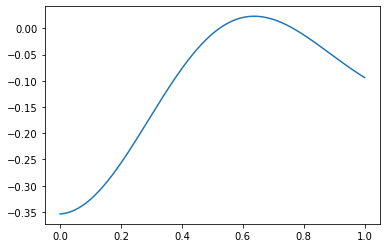

In [15]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [16]:
np.array(corr_t)

tensor([-3.53803820e-01, -3.53698505e-01, -3.53561701e-01,
        -3.53393432e-01, -3.53193725e-01, -3.52962616e-01,
        -3.52700147e-01, -3.52406362e-01, -3.52081316e-01,
        -3.51725067e-01, -3.51337678e-01, -3.50919220e-01,
        -3.50469769e-01, -3.49989407e-01, -3.49478220e-01,
        -3.48936303e-01, -3.48363754e-01, -3.47760679e-01,
        -3.47127186e-01, -3.46463393e-01, -3.45769420e-01,
        -3.45045396e-01, -3.44291453e-01, -3.43507730e-01,
        -3.42694369e-01, -3.41851522e-01, -3.40979342e-01,
        -3.40077989e-01, -3.39147630e-01, -3.38188435e-01,
        -3.37200580e-01, -3.36184247e-01, -3.35139623e-01,
        -3.34066899e-01, -3.32966272e-01, -3.31837944e-01,
        -3.30682123e-01, -3.29499020e-01, -3.28288852e-01,
        -3.27051841e-01, -3.25788214e-01, -3.24498203e-01,
        -3.23182042e-01, -3.21839974e-01, -3.20472244e-01,
        -3.19079101e-01, -3.17660800e-01, -3.16217601e-01,
        -3.14749766e-01, -3.13257564e-01, -3.11741265e-0